<a href="https://colab.research.google.com/github/almonil/Proyecto/blob/main/Proyectos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto




Se importan las librerias

In [438]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense
from keras.models import Model, load_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
import matplotlib.ticker as ticker

Se carga el archivo de datos a manejar en este caso Credit_data.csv

In [439]:
#Se carga el dataset a pandas dataframe
df= pd.read_csv('/content/Proyecto/credit_data.csv', delimiter=',')



Preprocesamiento de datos.

Aqui se ven ejemplos del dataframe y el uso de distintas librerias.

Ver los 5 mejores registros

In [440]:
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


determinar el número de registros en el conjunto de datos

In [441]:
print('El dataset contiene {0} filas and {1} columnas.'.format(df.shape[0], df.shape[1]))

El dataset contiene 284807 filas and 31 columnas.


Evaluación del modelo

Puntuación de precisión

In [442]:
legit_sample = legit.sample(n=492)
new_dataset_credit = pd.concat([legit_sample, fraud], axis=0)
new_dataset_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148752,90174.0,0.043,1.008,0.414,-0.399,0.545,-1.015,0.987,-0.323,1.145,-0.806,0.074,-2.053,2.299,1.417,-1.206,-0.133,0.264,-0.531,-0.270,-0.025,-0.404,-0.717,0.082,-0.076,-0.480,0.101,0.222,0.092,9.99,0
150217,92811.0,-1.478,-0.048,2.593,-2.537,0.028,0.136,-0.310,0.272,2.762,-1.233,1.532,-2.506,0.286,0.918,-0.856,1.010,-0.554,1.179,-1.210,0.068,-0.055,0.373,-0.405,0.669,0.391,0.534,0.176,-0.056,28.00,0
88887,62337.0,1.128,0.142,-0.014,0.986,0.150,-0.162,0.227,-0.093,-0.039,-0.065,-0.597,0.269,0.401,0.335,1.183,-0.094,-0.359,-0.453,-0.547,-0.021,0.058,0.138,-0.190,-0.440,0.676,-0.273,0.021,0.022,61.90,0
226956,144875.0,1.830,-0.576,-1.262,0.119,-0.068,-0.424,0.101,-0.163,0.761,-0.106,0.431,1.446,0.536,0.166,-1.005,-0.194,-0.555,-0.061,0.785,0.036,-0.075,-0.195,0.044,-0.456,-0.049,-0.092,-0.045,-0.051,110.12,0
54130,46298.0,-0.306,-0.608,1.544,-0.820,-1.410,0.365,0.013,0.164,-1.349,0.417,1.699,0.167,0.772,-0.330,0.612,0.966,0.311,-0.598,0.775,0.615,0.767,1.892,0.463,0.262,-1.037,-0.152,0.212,0.229,198.00,0


Dos columnas Time y Amount con sus datos de precision no normalizadas


In [443]:
#resumen numérico -> sólo columnas de interés no anonimizadas
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


visualizaciones de tiempo y cantidad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


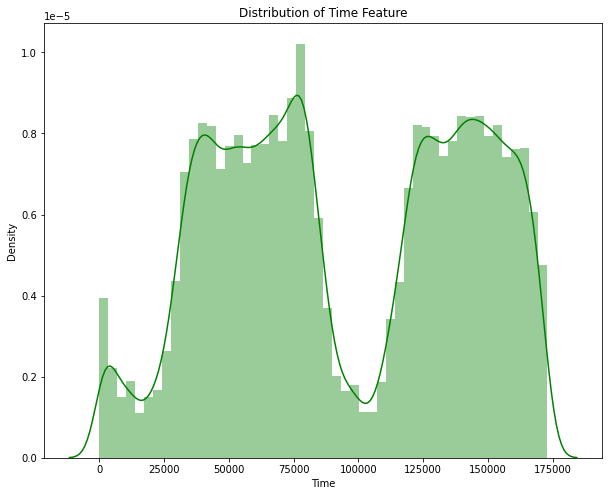

In [444]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time,color='green')

En ciertos momentos del tiempo se evidencia grandes cantidades de fraudes

Text(0.5, 1.0, 'Mapa térmico de la correlación')

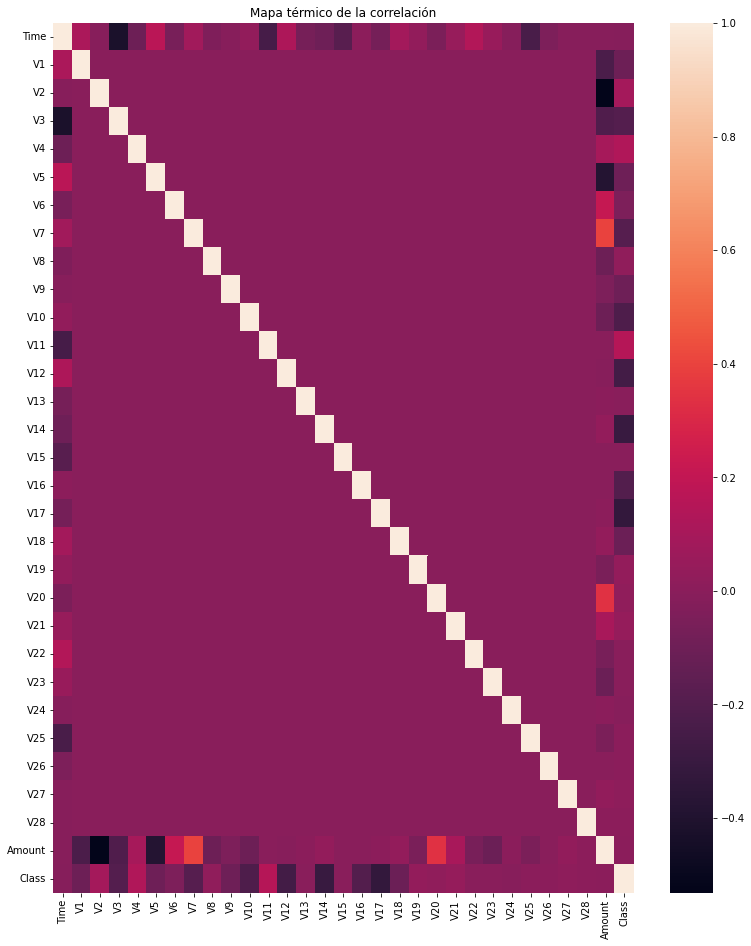

In [445]:
corr = df.corr()

plt.figure(figsize=(13,16))
heat = sns.heatmap(data=corr)
plt.title('Mapa térmico de la correlación')

In [446]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94952.545,0.123,0.030,0.011,-0.042,-0.041,-0.075,0.016,0.056,0.009,0.023,-0.043,0.025,6.618e-04,-0.015,-0.027,-0.035,0.052,-0.037,0.029,-0.031,0.015,0.007,0.015,0.021,-0.036,-0.019,0.004,-0.004,70.952
1,80746.807,-4.772,3.624,-7.033,4.542,-3.151,-1.398,-5.569,0.571,-2.581,-5.677,3.800,-6.259,-1.093e-01,-6.972,-0.093,-4.140,-6.666,-2.246,0.681,0.372,0.714,0.014,-0.040,-0.105,0.041,0.052,0.171,0.076,122.211


Entrenamiento del modelo

**Regresión logística**
Dividir los datos en datos de entrenamiento y datos de prueba


In [447]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',1) , df['Class'], test_size=0.5, random_state=0)
print(X.shape, X_train.shape, X_test.shape )


(984, 30) (142403, 30) (142404, 30)


In [448]:
y_test.value_counts()/y_test.count()

0    0.998
1    0.002
Name: Class, dtype: float64

In [449]:
y_train.value_counts()/y_train.count()

0    0.998
1    0.002
Name: Class, dtype: float64

In [450]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

In [451]:
model = LogisticRegression()

In [456]:
input_layer = Input(shape=(30, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(30,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [453]:
# Entrenamiento del modelo de regresión logística con datos de entrenamiento
model.fit(X_train,  y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [457]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions,1), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

reconstruction_error            ...                    
                          count      mean  ...       75%       max
true_class                                 ...                    
0                      142154.0  3163.279  ...  4647.364  5783.059
1                         249.0  2687.126  ...  4206.765  5671.989

[2 rows x 8 columns]

In [458]:
df = df.drop(['V4'], 1)
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [459]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [460]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
y_pred=[(lambda er: 1 if er>=11.078922  else 0)(er) for er in mse]

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

In [ ]:
encoder_all = Model(input_layer_all,encoded_all)
#enc_all = encoder_all.predict(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(enc_all,y_train)


In [ ]:
# Train the model using the training sets
knn_model.fit(enc_all,y_train)

In [455]:
%%time
knn_predicted= knn_model.predict(encoder_all.predict(X_test))

ValueError: ignored

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,knn_predicted)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))